# Credit Fraud Detection

In finance, machine learning play a crucial role against credit card fraud because of it's capability to scrutinize vast financial data and identify complex fraudulent problems. Taking this case will be beneficial in the world of finance to tackle fraud transactions and also for me to enhance my knowledge and technical skills in data science and machine learning

The dataset contains transactions that occured in 2 days from an European cardholders in September 2013. The task is to detect fraudulent credit card transactions or not by developing machine learning model. The target to predict is the "Class". 1 is representing the fraud ones and 0 is non-fraud

Data source and the details : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



## Import necessary libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, auc, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


## Load the data

In [2]:
data = pd.read_csv('../Datasets/01_creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Checking informations and the characteristics about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

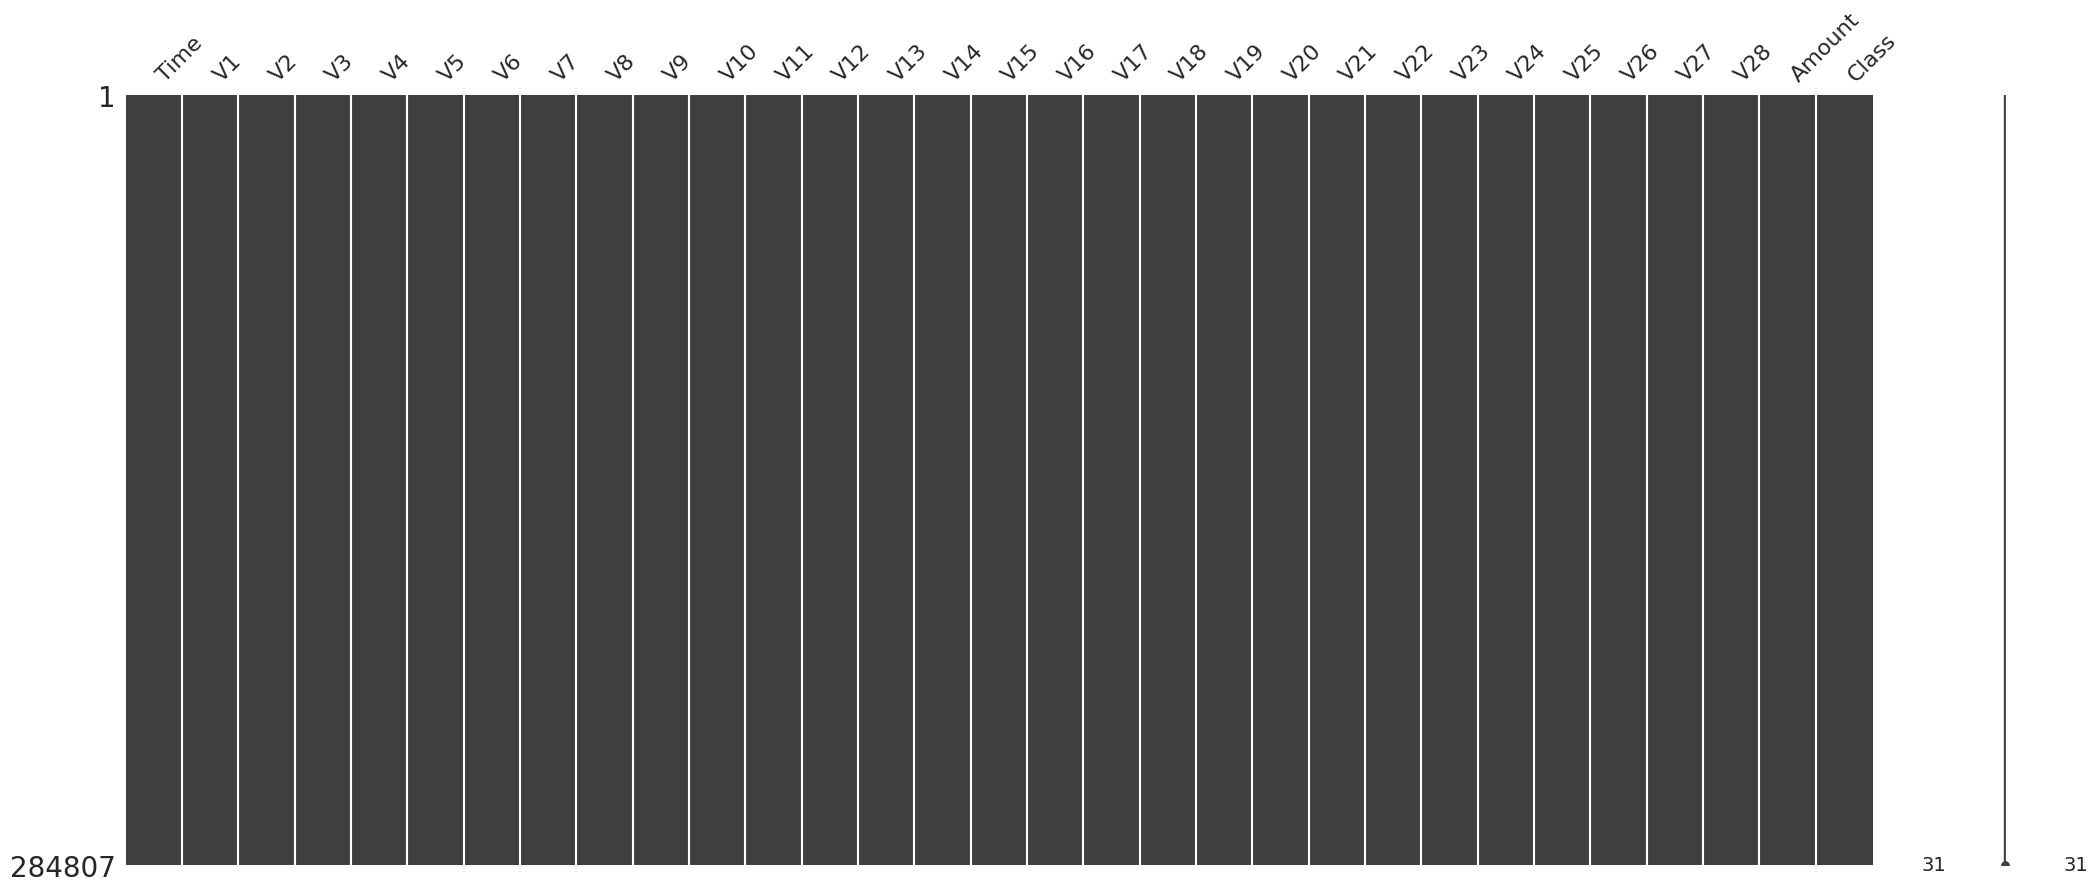

In [5]:
msno.matrix(data)

<Axes: >

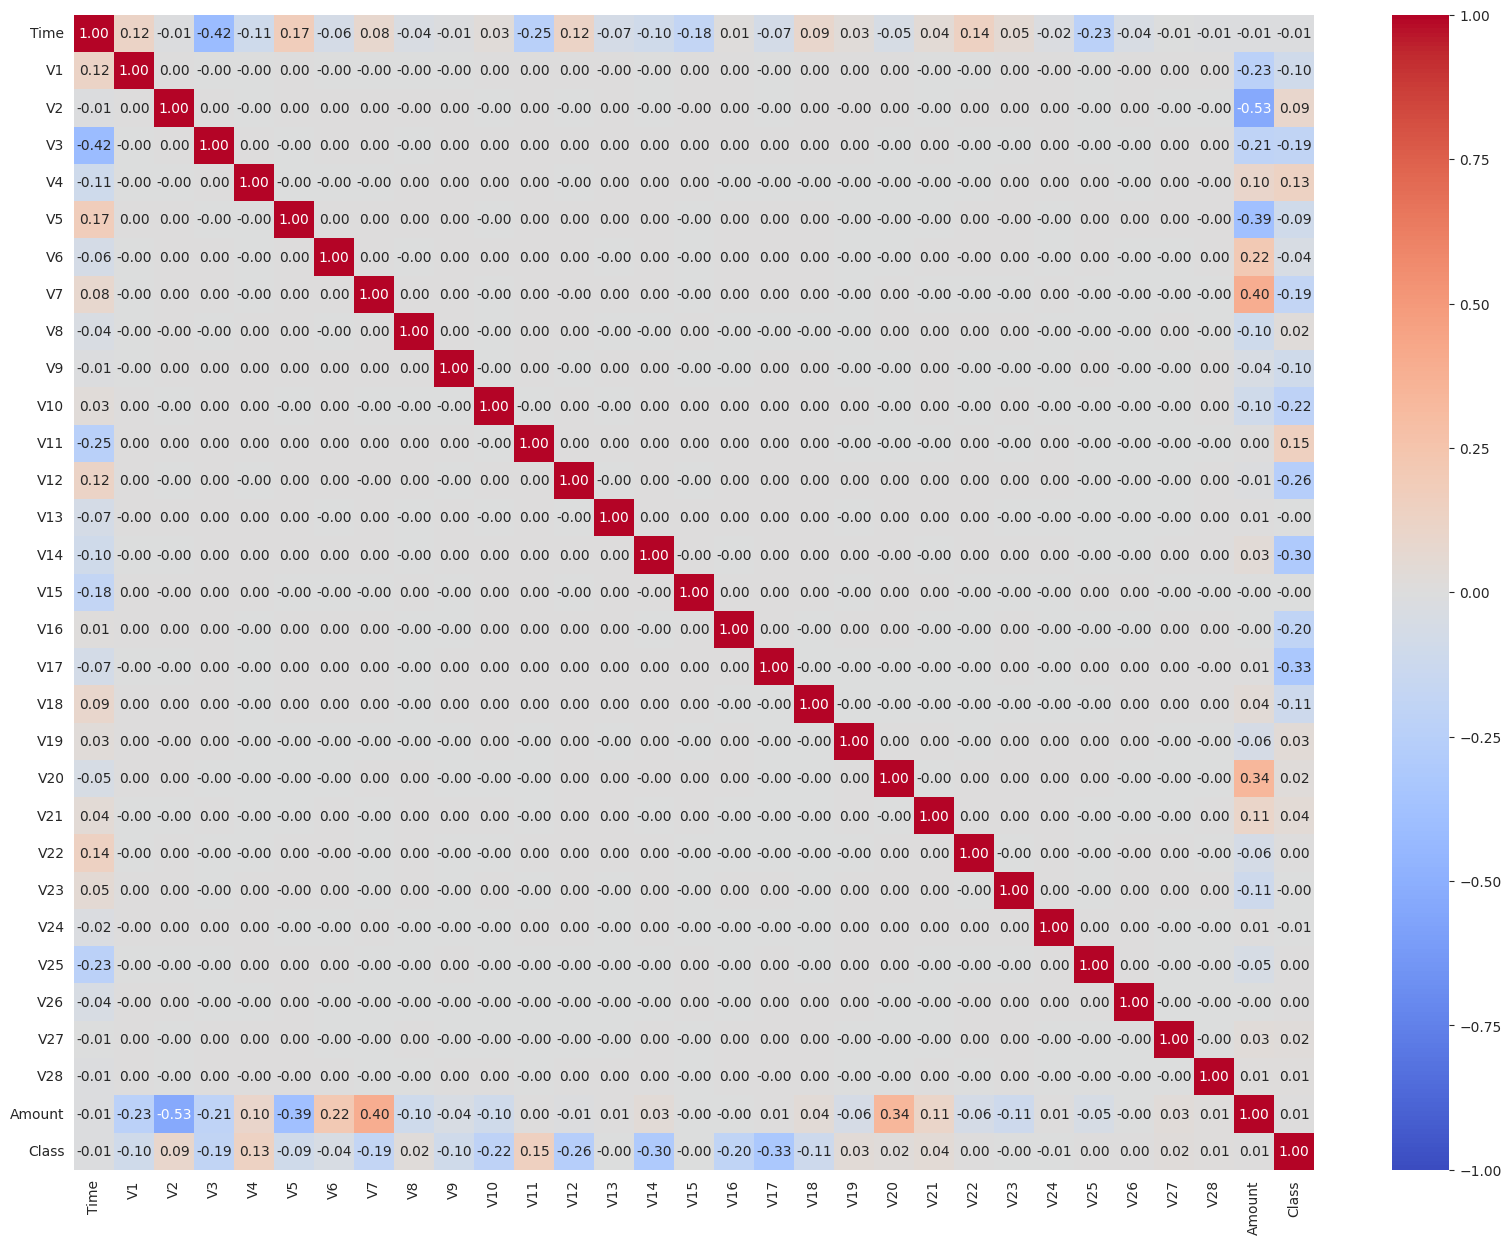

In [6]:
plt.figure(figsize=(20, 15))
corr_data = data.corr()
sns.heatmap(corr_data, annot=True, vmax=1, vmin=-1, cmap='coolwarm', fmt=".2f")

### Classifying the level of transaction (also intend feature engineering)

- If the transaction is below 500, it will consider a low transaction (represent as 0)
- If the transaction is between 500 and 2000, it will consider a middle transaction (represent as 1)
- If the transaction is above 2000, it will consider a high transaction (represent as 2)

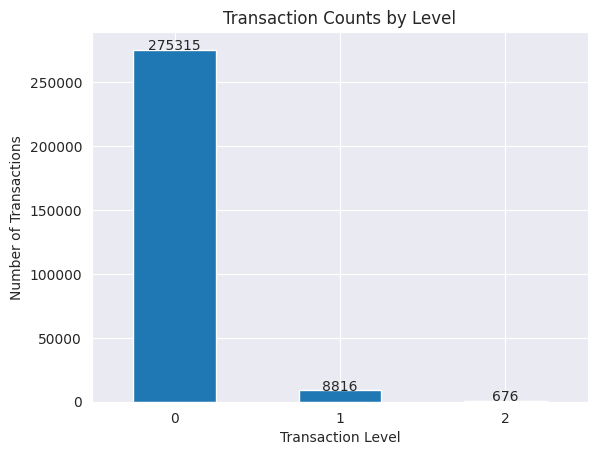

In [7]:
def calculate_transaction(amount):
    if amount < 500:
        return 0
    if 500 <= amount <= 2000:
        return 1
    if amount > 2000:
        return 2

data['Transaction level'] = data['Amount'].apply(calculate_transaction)

transaction_counts = data['Transaction level'].value_counts().sort_index()

transaction_counts.plot(kind='bar')
plt.title("Transaction Counts by Level")
plt.xlabel("Transaction Level")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)

for index, value in transaction_counts.items():
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

plt.show()

#### Now just calculate the fraudulent

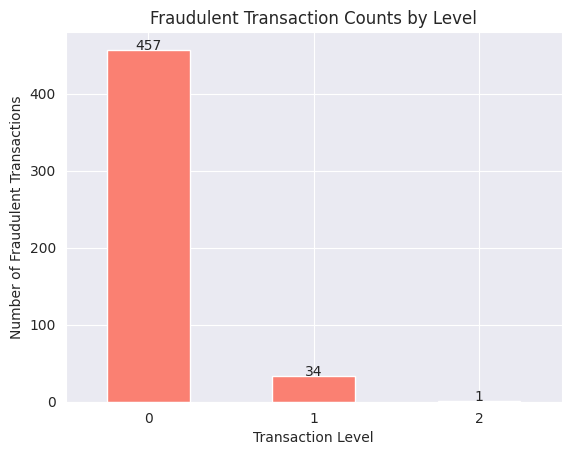

In [8]:
fraud_data = data[data['Class'] == 1]

fraud_data['Transaction level'] = fraud_data['Amount'].apply(calculate_transaction)

fraud_transaction_counts = fraud_data['Transaction level'].value_counts().sort_index()

fraud_transaction_counts.plot(kind='bar', color='salmon')
plt.title("Fraudulent Transaction Counts by Level")
plt.xlabel("Transaction Level")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(rotation=0)

for index, value in fraud_transaction_counts.items():
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=10)

plt.show()

#### Check the distribution on time, account, and class

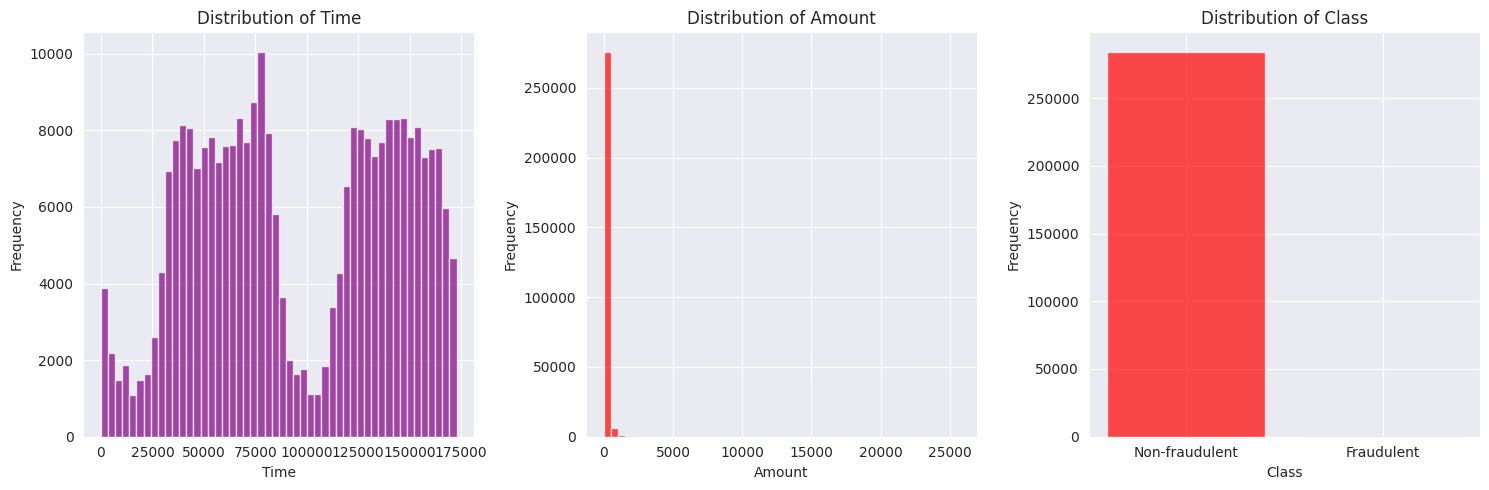

Total fraudulent transactions : 492
Total non-fraudulent transactions : 284315


In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(data['Time'], bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(data['Amount'], bins=50, color='red', alpha=0.7)
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")

class_counts = data['Class'].value_counts()

plt.subplot(1, 3, 3)
plt.bar(class_counts.index, class_counts.values, color=['red', 'purple'], alpha=0.7)
plt.title("Distribution of Class")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], labels=['Non-fraudulent', 'Fraudulent'])

plt.tight_layout()
plt.show()

total_fraud = class_counts[1]
total_non_fraud = class_counts[0]

print(f"Total fraudulent transactions : {total_fraud}")
print(f"Total non-fraudulent transactions : {total_non_fraud}")

#### Checking the distribution correlation between Time, Amount, and Class

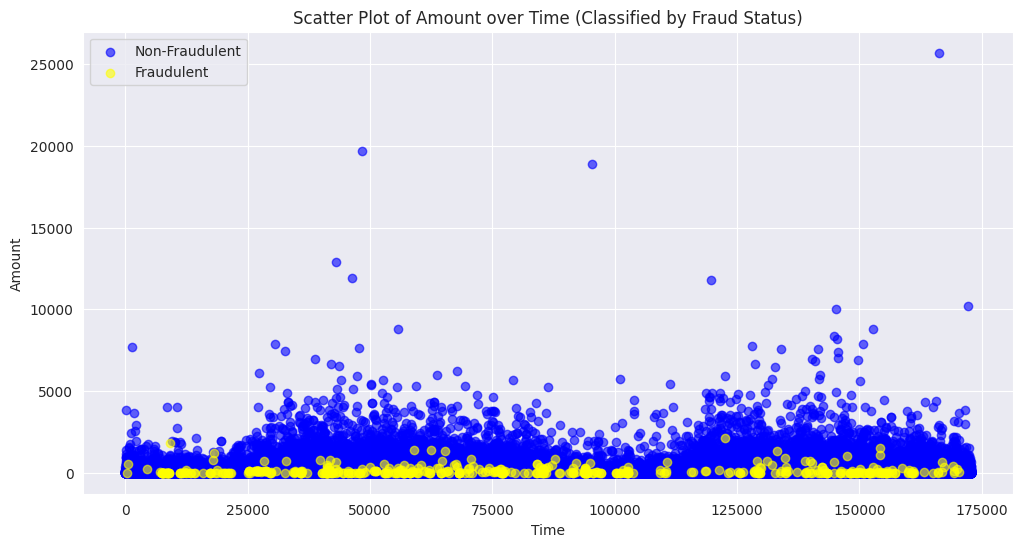

In [10]:
plt.figure(figsize=(12, 6))

plt.scatter(data[data['Class'] == 0]['Time'], data[data['Class'] == 0]['Amount'],
            color='blue', label='Non-Fraudulent', alpha=0.6)

plt.scatter(data[data['Class'] == 1]['Time'], data[data['Class'] == 1]['Amount'],
            color='yellow', label='Fraudulent', alpha=0.6)

plt.title("Scatter Plot of Amount over Time (Classified by Fraud Status)")
plt.xlabel("Time")
plt.ylabel("Amount")

plt.legend()
plt.grid(True)
plt.show()

So what i found there's no correlation between Time, Amount, Class, and Transaction Level that cause fraud transactions. Let's develop the prediction to detect the fraud transactions using machine learning!!

## Modelling

In [11]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction level
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


Define the target variable

In [12]:
X = data.drop('Class', axis=1)
y = data['Class']

Split the train and test data

In [13]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

## Use several models to compare which model performs the best between tree based models (Decision Trees, Random Forest, XGBoost, Gradient Boosting, LightGBM) & Generelized Linear Model (Logistic Regression)

### Logistic Regression

Area Under the Precision-Recall Curve (AUPRC): 0.74


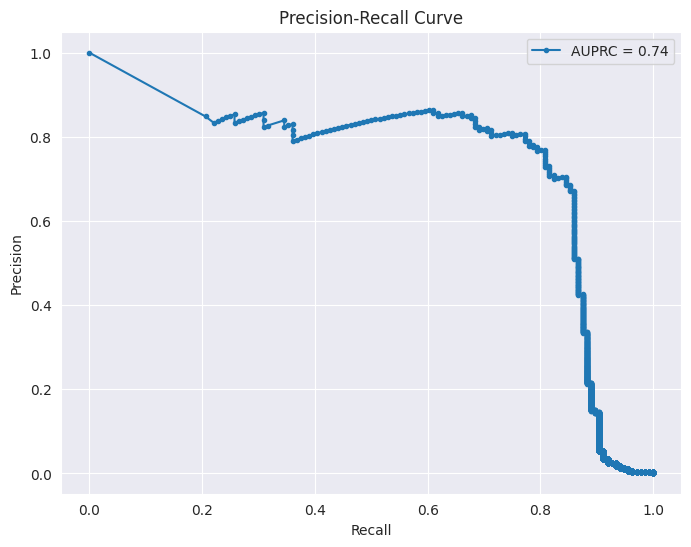

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.91      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [14]:
lgr = LogisticRegression(class_weight='balanced')
lgr.fit(X_train, y_train)

# Step 3: Make predictions and get prediction probabilities
y_scores = lgr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Class = 1)

# Step 4: Evaluate the model using precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Display the Area Under the Precision-Recall Curve
print(f"Area Under the Precision-Recall Curve (AUPRC): {pr_auc:.2f}")

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print classification report for additional insights
y_pred = lgr.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Logistic Regression + SMOTE

Area Under the Precision-Recall Curve (AUPRC): 0.77


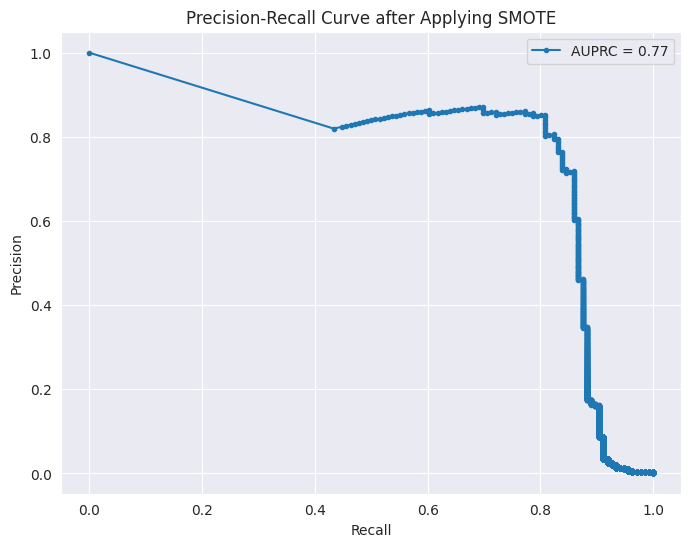

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.07      0.91      0.13       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [15]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train the logistic regression model on the resampled training data
lgr_smote = LogisticRegression()
lgr_smote.fit(X_train_resampled, y_train_resampled)

# Step 4: Make predictions and evaluate the model
y_scores = lgr_smote.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Class = 1)

# Step 5: Calculate Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Display the Area Under the Precision-Recall Curve
print(f"Area Under the Precision-Recall Curve (AUPRC): {pr_auc:.2f}")

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve after Applying SMOTE')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print classification report for additional insights
y_pred = lgr_smote.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Decision Tree

AUPRC (without SMOTE): 0.74


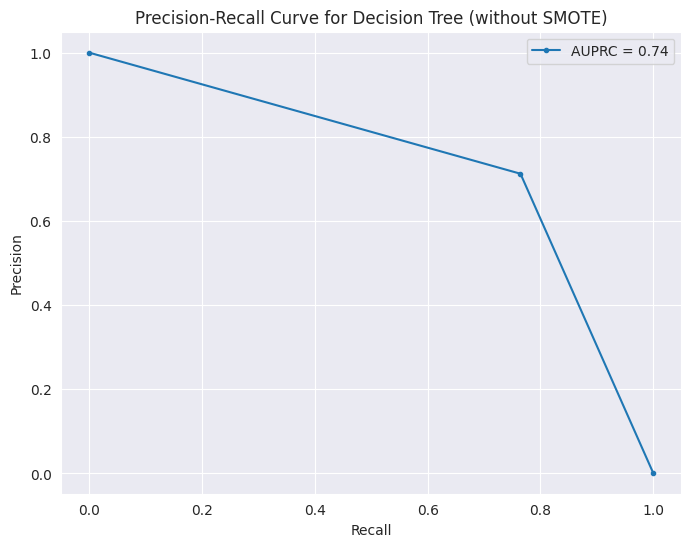

Classification Report (without SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.76      0.74       136

    accuracy                           1.00     85443
   macro avg       0.86      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [16]:
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model on the imbalanced training data
dt_model.fit(X_train, y_train)

# Get prediction probabilities for the positive class (Class = 1)
y_scores = dt_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Display AUPRC
print(f"AUPRC (without SMOTE): {pr_auc:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree (without SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred = dt_model.predict(X_test)
print("Classification Report (without SMOTE):")
print(classification_report(y_test, y_pred))

### Decision Tree + SMOTE

AUPRC (with SMOTE): 0.60


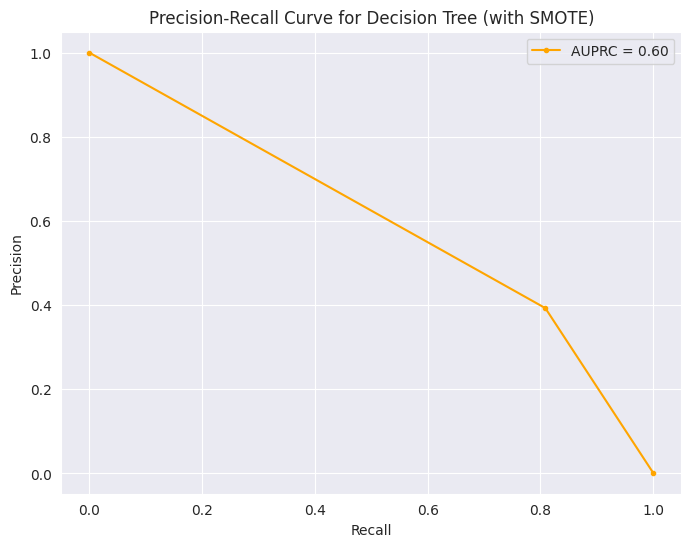

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.39      0.81      0.53       136

    accuracy                           1.00     85443
   macro avg       0.70      0.90      0.76     85443
weighted avg       1.00      1.00      1.00     85443



In [17]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Decision Tree model on the resampled (balanced) training data
dt_model_smote = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model_smote.fit(X_train_resampled, y_train_resampled)

# Get prediction probabilities for the positive class (Class = 1) on the original test data
y_scores_smote = dt_model_smote.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_scores_smote)
pr_auc_smote = auc(recall_smote, precision_smote)

# Display AUPRC with SMOTE
print(f"AUPRC (with SMOTE): {pr_auc_smote:.2f}")

# Plot Precision-Recall Curve with SMOTE
plt.figure(figsize=(8, 6))
plt.plot(recall_smote, precision_smote, marker='.', color='orange', label=f'AUPRC = {pr_auc_smote:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree (with SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred_smote = dt_model_smote.predict(X_test)
print("Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))

## Random Forest

AUPRC (without SMOTE): 0.88


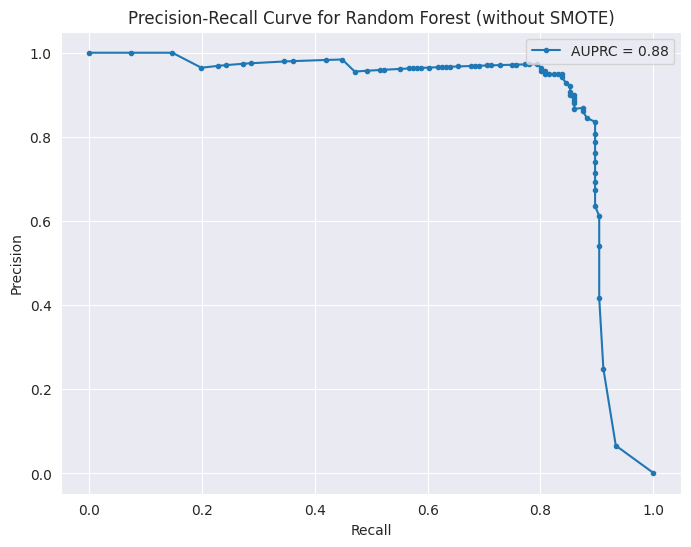

Classification Report (without SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.80      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on the imbalanced training data
rf_model.fit(X_train, y_train)

# Get prediction probabilities for the positive class (Class = 1)
y_scores = rf_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Display AUPRC
print(f"AUPRC (without SMOTE): {pr_auc:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest (without SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred = rf_model.predict(X_test)
print("Classification Report (without SMOTE):")
print(classification_report(y_test, y_pred))

## Random forest + SMOTE

AUPRC (with SMOTE): 0.88


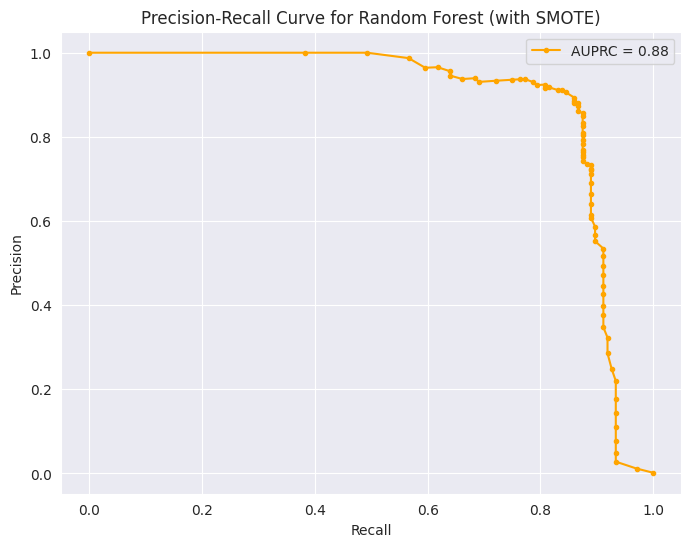

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [19]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest model on the resampled (balanced) training data
rf_model_smote = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# Get prediction probabilities for the positive class (Class = 1) on the original test data
y_scores_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_scores_smote)
pr_auc_smote = auc(recall_smote, precision_smote)

# Display AUPRC with SMOTE
print(f"AUPRC (with SMOTE): {pr_auc_smote:.2f}")

# Plot Precision-Recall Curve with SMOTE
plt.figure(figsize=(8, 6))
plt.plot(recall_smote, precision_smote, marker='.', color='orange', label=f'AUPRC = {pr_auc_smote:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest (with SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred_smote = rf_model_smote.predict(X_test)
print("Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))

## Gradient Boosting

AUPRC (without SMOTE): 0.16


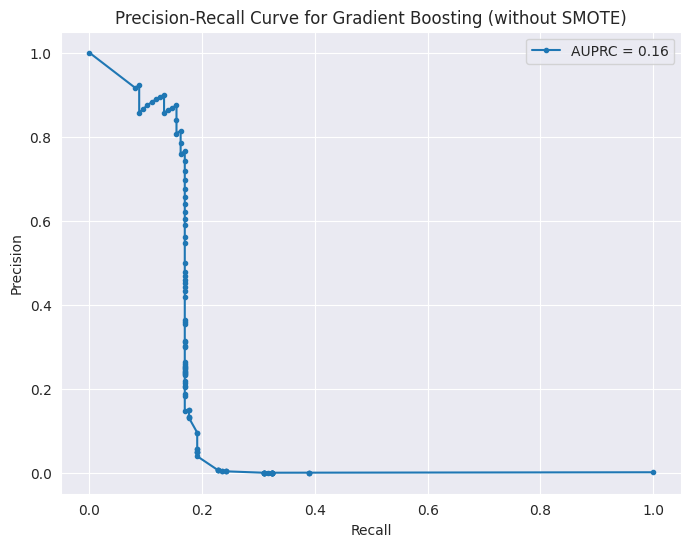

Classification Report (without SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.12      0.22       136

    accuracy                           1.00     85443
   macro avg       0.95      0.56      0.61     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the imbalanced training data
gb_model.fit(X_train, y_train)

# Get prediction probabilities for the positive class (Class = 1)
y_scores = gb_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Display AUPRC
print(f"AUPRC (without SMOTE): {pr_auc:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting (without SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred = gb_model.predict(X_test)
print("Classification Report (without SMOTE):")
print(classification_report(y_test, y_pred))


## Gradient Boosting + SMOTE

AUPRC (with SMOTE): 0.79


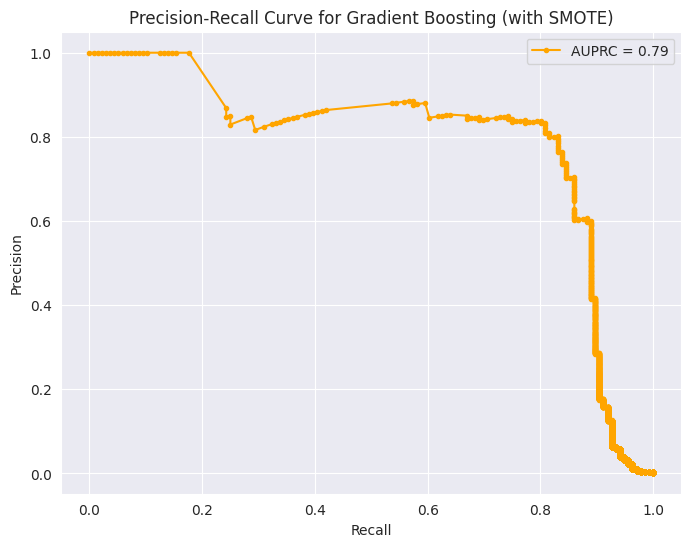

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.19      0.90      0.31       136

    accuracy                           0.99     85443
   macro avg       0.59      0.95      0.66     85443
weighted avg       1.00      0.99      1.00     85443



In [21]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Gradient Boosting model on the resampled (balanced) training data
gb_model_smote = GradientBoostingClassifier(random_state=42)
gb_model_smote.fit(X_train_resampled, y_train_resampled)

# Get prediction probabilities for the positive class (Class = 1) on the original test data
y_scores_smote = gb_model_smote.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_scores_smote)
pr_auc_smote = auc(recall_smote, precision_smote)

# Display AUPRC with SMOTE
print(f"AUPRC (with SMOTE): {pr_auc_smote:.2f}")

# Plot Precision-Recall Curve with SMOTE
plt.figure(figsize=(8, 6))
plt.plot(recall_smote, precision_smote, marker='.', color='orange', label=f'AUPRC = {pr_auc_smote:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting (with SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred_smote = gb_model_smote.predict(X_test)
print("Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))


## XGBoost

AUPRC (without SMOTE): 0.91


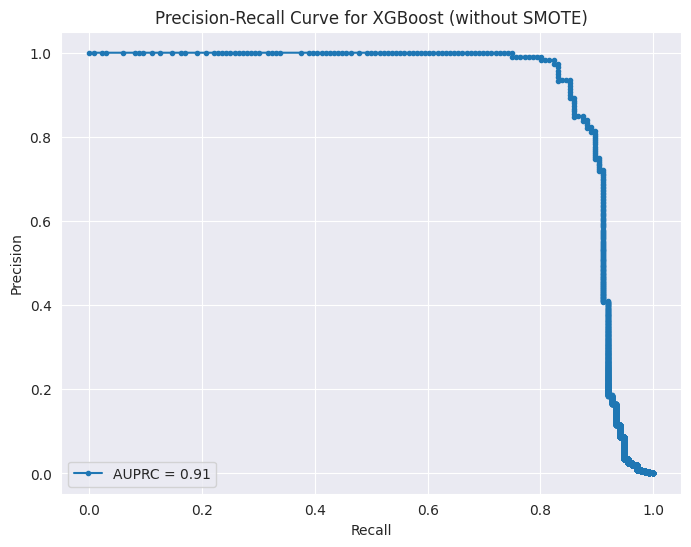

Classification Report (without SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.85      0.89       136

    accuracy                           1.00     85443
   macro avg       0.96      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
# Calculate scale_pos_weight for XGBoost to handle class imbalance
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize the XGBoost model with scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the imbalanced training data
xgb_model.fit(X_train, y_train)

# Get prediction probabilities for the positive class (Class = 1)
y_scores = xgb_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Display AUPRC
print(f"AUPRC (without SMOTE): {pr_auc:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost (without SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred = xgb_model.predict(X_test)
print("Classification Report (without SMOTE):")
print(classification_report(y_test, y_pred))


## XGBoost + SMOTE

AUPRC (with SMOTE): 0.88


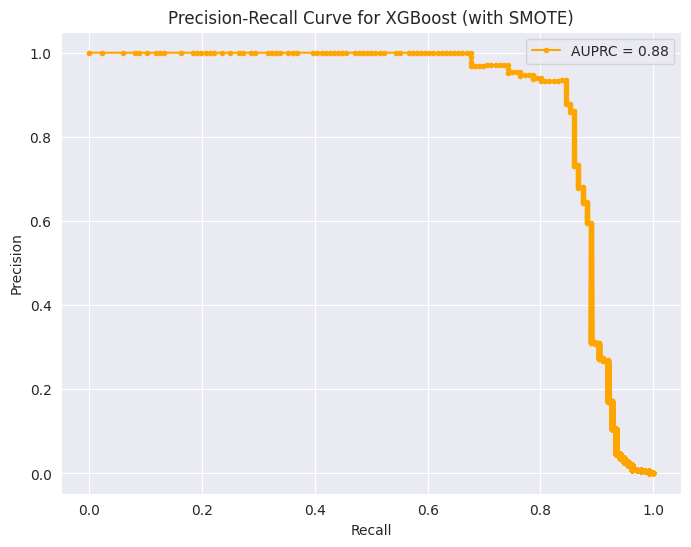

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.79      0.86      0.82       136

    accuracy                           1.00     85443
   macro avg       0.90      0.93      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [23]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the XGBoost model on the resampled (balanced) training data
xgb_model_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Get prediction probabilities for the positive class (Class = 1) on the original test data
y_scores_smote = xgb_model_smote.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_scores_smote)
pr_auc_smote = auc(recall_smote, precision_smote)

# Display AUPRC with SMOTE
print(f"AUPRC (with SMOTE): {pr_auc_smote:.2f}")

# Plot Precision-Recall Curve with SMOTE
plt.figure(figsize=(8, 6))
plt.plot(recall_smote, precision_smote, marker='.', color='orange', label=f'AUPRC = {pr_auc_smote:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost (with SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred_smote = xgb_model_smote.predict(X_test)
print("Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))


## LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 356, number of negative: 199008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7653
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
AUPRC (without SMOTE): 0.87


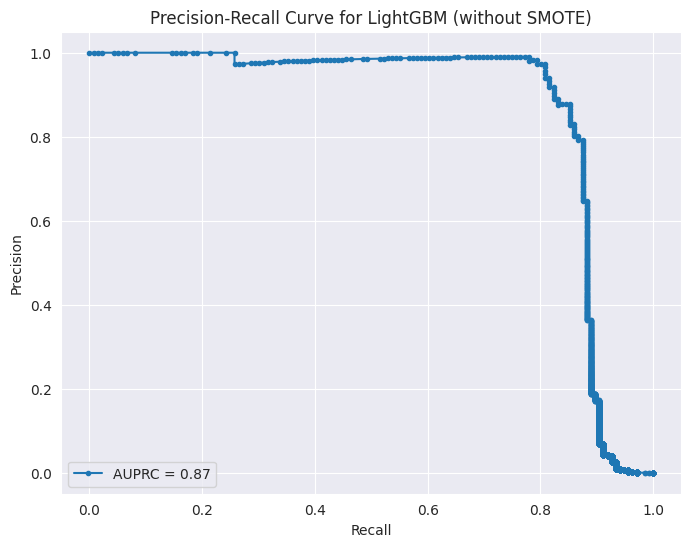

Classification Report (without SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.84      0.86       136

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
# Initialize the LightGBM model with class weight to handle imbalance
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)

# Train the model on the imbalanced training data
lgbm_model.fit(X_train, y_train)

# Get prediction probabilities for the positive class (Class = 1)
y_scores = lgbm_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Display AUPRC
print(f"AUPRC (without SMOTE): {pr_auc:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LightGBM (without SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred = lgbm_model.predict(X_test)
print("Classification Report (without SMOTE):")
print(classification_report(y_test, y_pred))


## LightGBM + SMOTE

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199008, number of negative: 199008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7653
[LightGBM] [Info] Number of data points in the train set: 398016, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
AUPRC (with SMOTE): 0.88


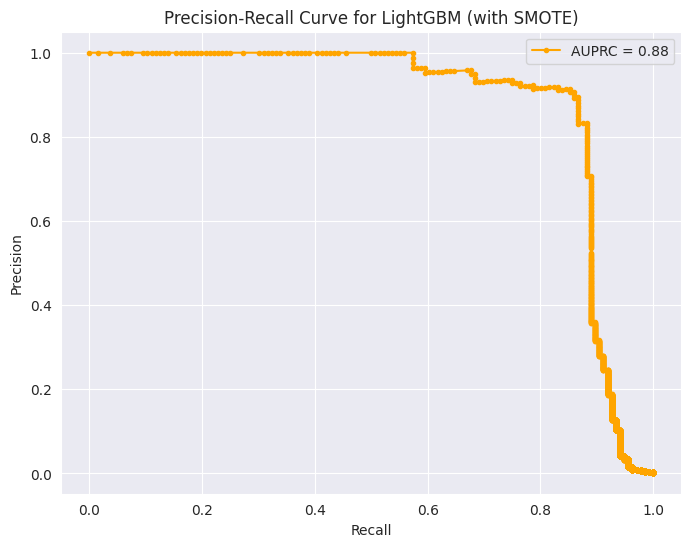

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.63      0.89      0.74       136

    accuracy                           1.00     85443
   macro avg       0.82      0.94      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the LightGBM model on the resampled (balanced) training data
lgbm_model_smote = LGBMClassifier(random_state=42)
lgbm_model_smote.fit(X_train_resampled, y_train_resampled)

# Get prediction probabilities for the positive class (Class = 1) on the original test data
y_scores_smote = lgbm_model_smote.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve and AUPRC
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_scores_smote)
pr_auc_smote = auc(recall_smote, precision_smote)

# Display AUPRC with SMOTE
print(f"AUPRC (with SMOTE): {pr_auc_smote:.2f}")

# Plot Precision-Recall Curve with SMOTE
plt.figure(figsize=(8, 6))
plt.plot(recall_smote, precision_smote, marker='.', color='orange', label=f'AUPRC = {pr_auc_smote:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LightGBM (with SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred_smote = lgbm_model_smote.predict(X_test)
print("Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))

So from all of those models, the 2 best performers are XGBoost and LightGBM + SMOTE/Random Forest + SMOTE/Random Forest. Let's just hypertune XGBoost and LightGMN + SMOTE using random search

## Hypertune XGBoost and LighGbm + SMOTE

#### Hypertune on XGBoost

In [27]:
# Calculate scale_pos_weight to handle class imbalance
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [scale_pos_weight]
}


In [34]:
# RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,  # Number of parameter settings to try
    scoring='average_precision',  # Use average precision as scoring
    cv=3,
    random_state=42,
    n_jobs=-1  # Use all available cores
)


In [35]:
# Fit XGBoost RandomizedSearchCV
xgb_random_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for XGBoost:", xgb_random_search.best_params_)
xgb_best_model = xgb_random_search.best_estimator_

# Evaluate on test data
y_scores_xgb = xgb_best_model.predict_proba(X_test)[:, 1]

# Calculate AUPRC
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_scores_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
print(f"AUPRC for Best XGBoost Model: {pr_auc_xgb:.2f}")


/home/diyrad167/Documents/Work/Cognorise intern/The_project/Cognorise/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [22:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/diyrad167/Documents/Work/Cognorise intern/The_project/Cognorise/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [22:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/diyrad167/Documents/Work/Cognorise intern/The_project/Cognorise/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [22:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/diyrad167/Documents/Work/Cognorise intern/The_project/Cognorise/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [22:38:54] WARNING: /workspace/src

Best parameters for XGBoost: {'subsample': 0.8, 'scale_pos_weight': np.float64(559.0112359550562), 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
AUPRC for Best XGBoost Model: 0.90


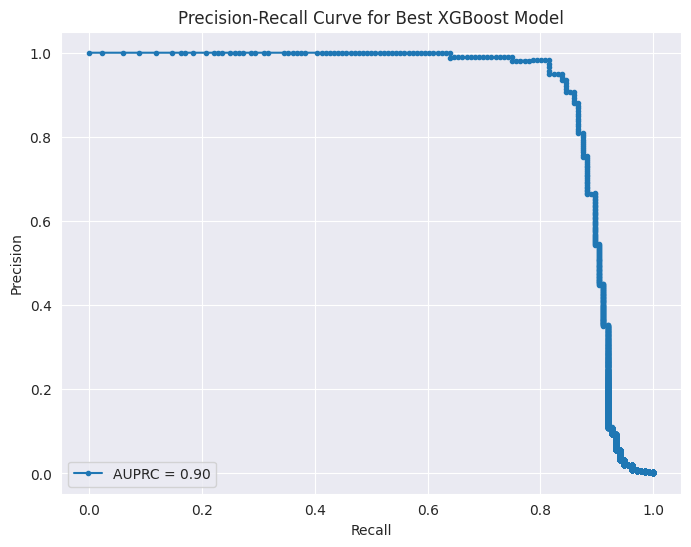

Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.90      0.86      0.88       136

    accuracy                           1.00     85443
   macro avg       0.95      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [36]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, marker='.', label=f'AUPRC = {pr_auc_xgb:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Best XGBoost Model')
plt.legend()
plt.grid(True)
plt.show()

# Classification report for additional insights
y_pred_xgb = xgb_best_model.predict(X_test)
print("Classification Report for Best XGBoost Model:")
print(classification_report(y_test, y_pred_xgb))


#### Hypertune on LightGBM + SMOTE

In [37]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Parameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 40, 50, 60],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV for LightGBM
lgbm_random_search = RandomizedSearchCV(
    estimator=lgbm_model_smote,
    param_distributions=lgbm_param_grid,
    n_iter=20,  # Number of parameter settings to try
    scoring='average_precision',  # Use average precision as scoring
    cv=3,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [38]:
# Fit LightGBM RandomizedSearchCV
lgbm_random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
print("Best parameters for LightGBM:", lgbm_random_search.best_params_)
lgbm_best_model = lgbm_random_search.best_estimator_

# Evaluate on test data
y_scores_lgbm = lgbm_best_model.predict_proba(X_test)[:, 1]

# Calculate AUPRC
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_scores_lgbm)
pr_auc_lgbm = auc(recall_lgbm, precision_lgbm)
print(f"AUPRC for Best LightGBM Model (with SMOTE): {pr_auc_lgbm:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 132672, number of negative: 132672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.165145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7653
[LightGBM] [Info] Number of data points in the train set: 265344, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

# PEMISAH

In [47]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7)
}

In [48]:
def evaluate_model(model, X_train, y_train, X_test, y_test, apply_smote=False):
    if apply_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class (Class = 1)

    # Precision-Recall Curve and AUPRC
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    return pr_auc

In [49]:
results = {}
for model_name, model in models.items():
    # Without SMOTE
    pr_auc_without_smote = evaluate_model(model, X_train, y_train, X_test, y_test, apply_smote=False)

    # With SMOTE
    pr_auc_with_smote = evaluate_model(model, X_train, y_train, X_test, y_test, apply_smote=True)

    # Store results
    results[model_name] = {
        "AUPRC without SMOTE": pr_auc_without_smote,
        "AUPRC with SMOTE": pr_auc_with_smote
    }

# Display the results
results_df = pd.DataFrame(results).T
print("Comparison of AUPRC Scores with and without SMOTE:")
print(results_df)


Comparison of AUPRC Scores with and without SMOTE:
                     AUPRC without SMOTE  AUPRC with SMOTE
Logistic Regression             0.741409          0.768955
Naive Bayes                     0.366817          0.394345
Decision Tree                   0.744118          0.576771
Random Forest                   0.876331          0.884492
Gradient Boosting               0.158389          0.788325
XGBoost                         0.906269          0.871799
K-Nearest Neighbors             0.182636          0.250510


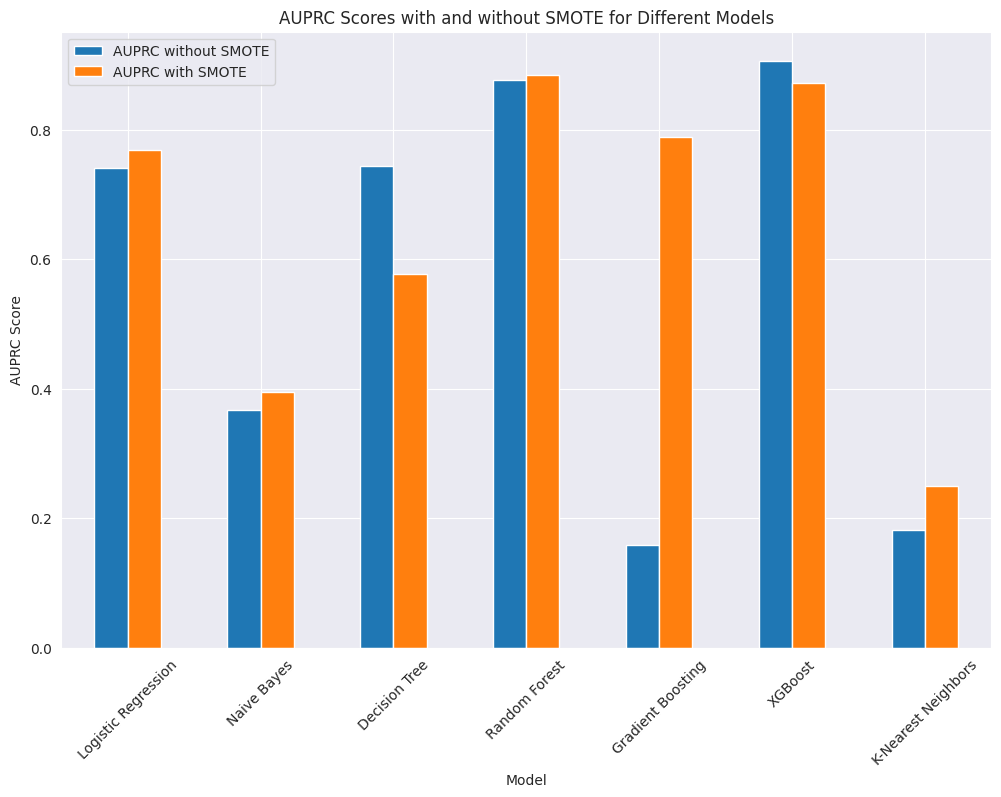

In [50]:
results_df.plot(kind='bar', figsize=(12, 8))
plt.title("AUPRC Scores with and without SMOTE for Different Models")
plt.ylabel("AUPRC Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()